# Лабораторная работа №2
## "Исследовательский анализ данных"

### Подготовка данных

В данной лабораторной работе необходимо составить различные диаграммы на основе нового файла `clients2.csv`. Была определено, что данный файл идентичен с файлом в лабораторной работе №1, поэтому были совершены такие же действия для предварительной обработки данных: были удалены лишние объекты, такие как дубликаты и строки с нулевыми значениями, и изменены названия столбцов и тип данных некоторых из них. Также были испортированы библиотеки `matplotlib` и `seaborn`, которые понадобятся для создания диаграмм

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clients2.csv',sep=';')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Dt_Customer,NumDealsPurchases
0,5524,1957,Graduation,Single,58138.0,0.0,04.09.2012,3.0
1,2174,1954,Graduation,Single,46344.0,1.0,08.03.2014,2.0
2,4141,1965,Graduation,Together,71613.0,0.0,21.08.2013,1.0
3,6182,1984,Graduation,Together,26646.0,1.0,10.02.2014,2.0
4,5324,1981,PhD,Married,58293.0,1.0,19.01.2014,5.0
5,7446,1967,Master,Together,62513.0,0.0,09.09.2013,2.0
6,965,1971,Graduation,Divorced,55635.0,0.0,13.11.2012,4.0
7,6177,1985,PhD,Married,33454.0,1.0,08.05.2013,2.0
8,4855,1974,PhD,Together,30351.0,1.0,06.06.2013,1.0
9,5899,1950,PhD,Together,5648.0,1.0,13.03.2014,1.0


In [20]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Dt_Customer', 'NumDealsPurchases'],
      dtype='object')

In [21]:
df = df.rename(columns= {'Kidhome':'Children'})
df = df.rename(columns= {'NumDealsPurchases':'Purchases'})
df = df.rename(columns= {'Year_Birth': 'Birth_Year'})
df = df.rename(columns= {'Dt_Customer': 'Reg_Date'})

print(df.columns)

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income', 'Children',
       'Reg_Date', 'Purchases'],
      dtype='object')


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              796 non-null    int64  
 1   Birth_Year      796 non-null    int64  
 2   Education       796 non-null    object 
 3   Marital_Status  796 non-null    object 
 4   Income          784 non-null    float64
 5   Children        795 non-null    float64
 6   Reg_Date        795 non-null    object 
 7   Purchases       795 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.9+ KB


In [23]:
df_nan = df[df.isnull().any(axis=1)]
display(df_nan)

,ID,Birth_Year,Education,Marital_Status,Income,Children,Reg_Date,Purchases
10,1994,1983,Graduation,MARRIED,NaN,NaN,NaN,NaN
26,5255,1986,Graduation,Single,NaN,1.0,20.02.2013,0.0
41,7281,1959,PhD,Single,NaN,0.0,05.11.2013,1.0
45,7244,1951,Graduation,Single,NaN,2.0,01.01.2014,3.0
55,8557,1982,Graduation,Single,NaN,1.0,17.06.2013,2.0
83,8996,1957,PhD,Married,NaN,2.0,19.11.2012,12.0
84,9235,1957,Graduation,Single,NaN,1.0,27.05.2014,1.0
85,5798,1973,Master,Together,NaN,0.0,23.11.2013,1.0
116,8268,1961,PhD,Married,NaN,0.0,11.07.2013,3.0
121,1295,1963,Graduation,Married,NaN,0.0,11.08.2013,1.0


In [24]:
df = df.dropna()
df.isna().sum()

ID                0
Birth_Year        0
Education         0
Marital_Status    0
Income            0
Children          0
Reg_Date          0
Purchases         0
dtype: int64

In [25]:
df['Children'] = df['Children'].astype(int)
df['Purchases'] = df['Purchases'].astype(int)

In [26]:
df['Reg_Date'] = pd.to_datetime(df['Reg_Date'], format='%d.%m.%Y')

In [27]:
description = df.drop(columns='Reg_Date').describe()
display(description)

,ID,Birth_Year,Income,Children,Purchases
count,784.000000,784.000000,784.00000,784.000000,784.000000
mean,5628.014031,1968.343112,53130.07398,0.434949,2.307398
std,3279.536751,12.013759,21818.56876,0.542783,1.914827
min,0.000000,1899.000000,2447.00000,0.000000,0.000000
25%,2853.000000,1959.000000,36141.75000,0.000000,1.000000
50%,5558.500000,1969.500000,52372.50000,0.000000,2.000000
75%,8594.250000,1977.000000,69293.25000,1.000000,3.000000
max,11191.000000,1995.000000,162397.00000,2.000000,15.000000


In [28]:
print(df['Marital_Status'].unique())
print(df['Education'].unique())

['Single' 'Together' 'Married' 'Divorced' 'SINGL' 'MARRIED' 'Widow'
 'Alone']
['Graduation' 'PhD' 'Master' 'Basic']


In [29]:
dubles = ['SINGL','Alone']
df['Marital_Status'] = df['Marital_Status'].replace(dubles,'Single')
df['Marital_Status'] = df['Marital_Status'].replace('MARRIED','Married')
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [30]:
df = df.drop_duplicates()

### Построение диаграмм

Для того, чтобы понять, на основе каких данных можно составлять диаграммы, можно вывести маленькую часть датасета с помощью метода `df.head()` 

In [31]:
df.head(5)

,ID,Birth_Year,Education,Marital_Status,Income,Children,Reg_Date,Purchases
0,5524,1957,Graduation,Single,58138.0,0,2012-09-04,3
1,2174,1954,Graduation,Single,46344.0,1,2014-03-08,2
2,4141,1965,Graduation,Together,71613.0,0,2013-08-21,1
3,6182,1984,Graduation,Together,26646.0,1,2014-02-10,2
4,5324,1981,PhD,Married,58293.0,1,2014-01-19,5


В данном датасете большинство столбцов имеет числовые значения и только столбцы `Education` и `Marital_Status` содержат в себе текстовые значения. На основе столбцов с числовыми данными будут построены следующие диаграммы: `scatter`и `heatmap`

Диаграмму рассеяния можно создать с помощью метода `scatter`библиотеки `matplotlib`, которая сокращена до `plt`. Внутри данного метода необходимо поместить столбцы, на основе которых будет создана диаграмма, также метод может содержать другие параметры, к примеру, цвет и размер точек, а также цветовые карты.

Была построена диаграмма рассеяния на основе столбцов `Income` и `Birth_Year`, так как эти данные могут визуализировать полезную для анализа информацию

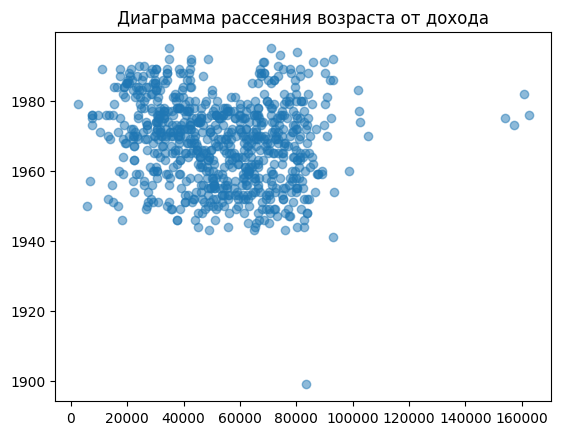

In [32]:
plt.scatter(df['Income'],df['Birth_Year'],alpha=0.5)
plt.title('Диаграмма рассеяния возраста от дохода')
plt.show()

По данной диаграмме можно увидеть, что в датасете есть несколько выбивающихся точек, а остальные значения находятся близко друг к другу. 

Также с помощью метода `pairplot` библиотеки `seaborn` была выведена матрица диаграмм, где показана взаимосвязь всех числовых столбцов. Были выведены все столбцы, кроме столбца `ID`, он был удалён с помощью метода `drop()`

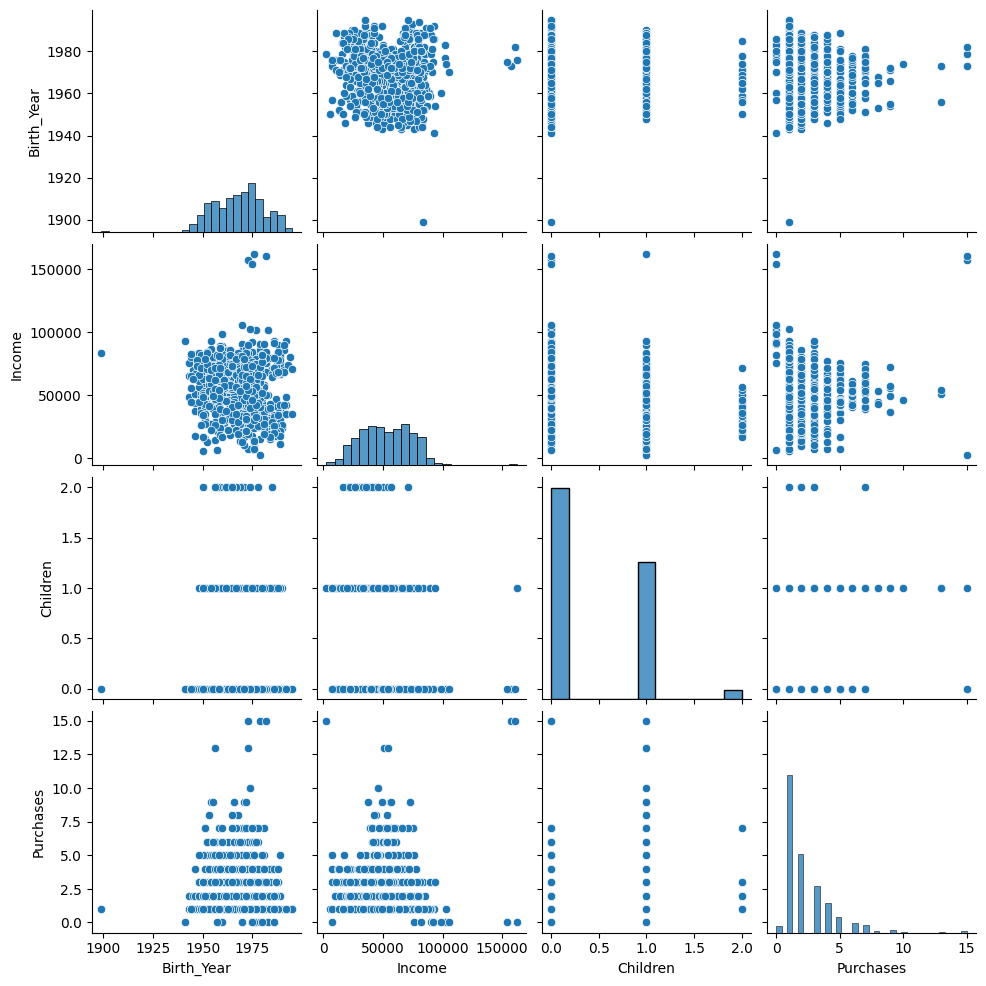

In [33]:
df_corr = df.drop('ID',axis=1)
sns.pairplot(df_corr)

По данной матрице диаграмм можно увидеть, что линейной зависимости столбцов друг с другом практически нет. Графики по диагонали показывают, каких значений больше всего по всему датасету. К примеру, можно увидеть, что у большинства клиентов нет детей, а также большинство клиентов сделали только 1 заказ

Была составлена матрица ковариаций с помощью метода `cov()`. Ковариация показывает, как переменные взаимодействуют друг с другом. Например, если ковариация положительная, переменные имеют тенденцию расти вместе, если отрицательная — одна переменная увеличивается, когда другая уменьшается.

In [42]:
covar = df_corr.cov(numeric_only=True)
display(covar)

,Birth_Year,Income,Children,Purchases
Birth_Year,144.370197,-3.781839e+04,1.682306,-1.230145
Income,-37818.386778,4.784848e+08,-6365.870771,-2291.470712
Children,1.682306,-6.365871e+03,0.294478,0.191111
Purchases,-1.230145,-2.291471e+03,0.191111,3.684900


Наиболее сильная связь наблюдается между возрастом и доходом, а также между доходом и количеством детей — обе эти зависимости отрицательные.
Это говорит о том, что более молодые клиенты зарабатывают меньше, а также клиенты имеют больший доход, если у них меньше детей

Далее была выведена таблица корреляции всех числовых столбцов с помощью метода `df.corr()`. Корреляция показывает уровень зависимости числовых столбцов друг от друга.

In [34]:
correl = df_corr.corr(numeric_only= True)
display(correl)

,Birth_Year,Income,Children,Purchases
Birth_Year,1.000000,-0.143890,0.258012,-0.053334
Income,-0.143890,1.000000,-0.536287,-0.054572
Children,0.258012,-0.536287,1.000000,0.183462
Purchases,-0.053334,-0.054572,0.183462,1.000000


По данной таблице можно понять, что взаимосвязь столбцов друг с другом практически нулевая, то есть корреляция между ними не наблюдается. Также была построена диаграмма `heatmap`, которая показывает уровень корреляции между столбцами графически с помощью метода `heatmap` библиотеки `seaborn`, сокращённо `sns`.

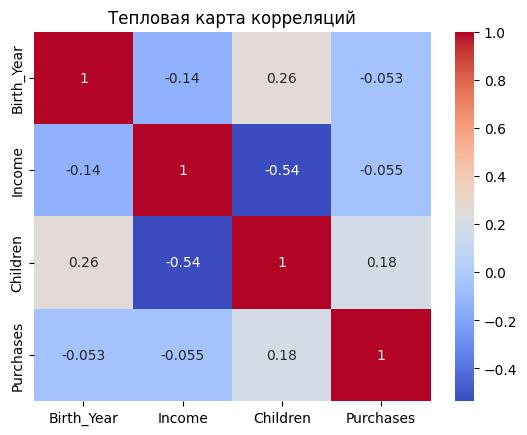

In [35]:
sns.heatmap(correl,annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

Значения между всеми столбцами имеют низкую корреляцию, кроме корреляции столбцов `Income` и `Children`

### Задание 1
_Использовать seaborn. Построить диаграмму по группировке - количество клиентов по количеству детей и по каждому семейному статусу (marital_status)_


Для того чтобы сделать гистограмму, необходимо сгруппировать датасет по количеству детей и по семейному положению и создать из этого датафрейм с помощью метода `pd.DataFrame()`

In [36]:
un = df.groupby(['Marital_Status','Children'])
df_hist = un['ID'].count()
hist = pd.DataFrame(df_hist)
display(hist)

ID
Marital_Status Children     
Divorced       0          52
               1          31
               2           2
Married        0         166
               1         125
               2          11
Single         0          97
               1          72
               2           3
Together       0         123
               1          66
               2           3
Widow          0          24
               1           5

Из получившейся таблицы можно сделать гистограмму. Создаётся гистограмма с помощью метода `histplot` библиотеки `seaborn`. Данный метод имеет множество параметров, были использованы параметры `data` - данные, по которой будет создаваться гистограмма, `x` - что будет находиться на оси абсциссы, `weights` - по какому значению будет строиться гистограмма, `hue` - какие значения будут окрашиваться в разные цвета, `multiple` - параметр, отвечающий за расположение различных показателей, `kde` - линия тренда, принимает бинарное значение.

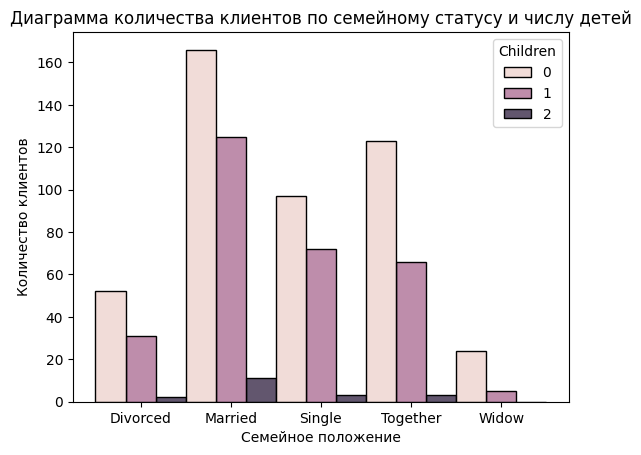

In [37]:
sns.histplot(data=hist,x="Marital_Status",weights="ID",hue="Children", multiple="dodge",kde=False)

plt.xlabel('Семейное положение')
plt.ylabel('Количество клиентов')
plt.title('Диаграмма количества клиентов по семейному статусу и числу детей')
plt.show()

По данной гистограмме можно сделать следующие выводы:
+ Больше всего клиентов не имеют детей
+ Замужние/женатые клиенты составляют крупнейшую группу
+ Меньше всего клиентов с двумя детьми
+ Категории `Single` и `Together` имеют схожие распределения
+ Вдовцы составляют самую маленькую группу клиентов, ни у одного вдовца нет 2 детей

### Задание 2
_Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить минимальный доход по образованию. Отобразить маркеры в виде ⬤ красного цвета размером 18_

Была создана сводная таблица минимального дохода по уровню образования с помощю метода `pivot.table()`

In [38]:
pivot_min = df.pivot_table(values="Income", index="Education", aggfunc="min")
display(pivot_min)

,Income
Education,
Basic,7500.0
Graduation,2447.0
Master,7500.0
PhD,5648.0


Далее была создана диаграмма рассеяния по данной таблице с помощью метода `plot` библиотеки `pandas`. На вход были приняты такие параметры как столбцы `Income` и `Education`, вид диаграммы `scatter` и изменение размера и цвета точек на диаграмме 

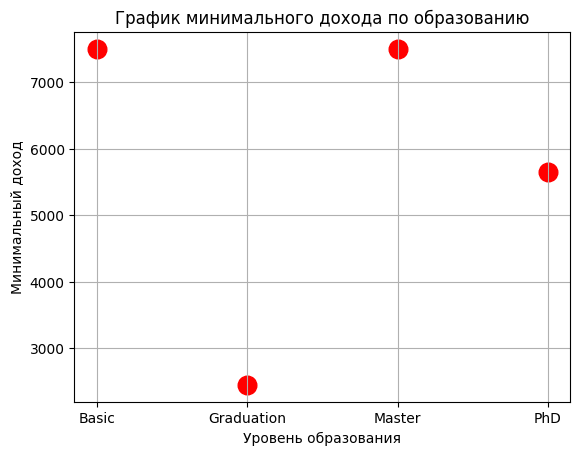

In [39]:
pivot_min = pivot_min.reset_index()
sctr = pivot_min.plot(x='Education', y='Income', kind='scatter',s=180,c=['red'])


plt.xlabel('Уровень образования')
plt.ylabel('Минимальный доход')
plt.title('График минимального дохода по образованию')
plt.grid(True)

plt.show(sctr)


Выводы по данной диаграмме можно сделать следующие:
+ Наивысший минимальный доход для уровня образования `Basic` и `Master`
+ Наименьший минимальный доход для уровня `Graduation`
+ Минимальный доход для `PhD` ниже, чем у `Basic` и `Master`

### Задание 3
_Использовать matplotlib. Отфильтровать клиентов по year_birth больше 1980. Построить круговую диаграмму, которая отображает процент клиентов каждого семейного положения_

Для того, чтобы создать круговую диаграмму, датасет был отсортирован по дате рождения больше 1980 года. Была создана диаграмма с помощю метода `pie` библиотеки `matplotlib`. В параметрах были занесены столбцы, по которым будет создаваться диаграмма, а также отображение процентного соотношения

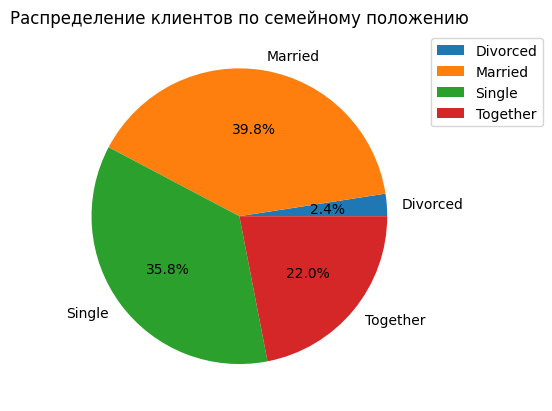

In [40]:
df_filter = df.query('Birth_Year > 1980')
filter_pivot = df_filter.pivot_table(values='ID', index='Marital_Status', aggfunc="count")
filter_pivot = filter_pivot.reset_index()

plt.pie(filter_pivot['ID'],labels=filter_pivot['Marital_Status'],autopct='%1.1f%%')
plt.title('Распределение клиентов по семейному положению')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Из диаграммы можно сделать вывод, что большинство клиентов младше 1980 года находятся в браке или не состоят в официальных отношениях. Люди, живущие вместе, составляют около пятой части клиентов, а разведенные составляют небольшую часть клиентской базы.

### Вывод

В данной лабораторной работе были созданы несколько графиков по заданному датасету: гистограммы, диаграммы рассеяния, heatmap, круговая диаграмма. Были использованы библиотеки pandas, matplotlib и seaborn для создания всех диаграмм. Также были рассчитаны корреляция и ковариация данных.

В ходе выполнения лабораторной работы было выяснено, что данные в данном датасете практически никак не взаимосвязаны друг с другом и имеют слабую корреляцию кроме зависимости дохода от количества детей: чем меньше детей, тем больше достаток, а также коэффициент ковариации показал сильную отрицательную взаимосвязь дохода с годом рождения.

По графикам, созданным в индивидуальном варианте, можно сделать вывод, что большая часть клиентов находится в браке, а также у большинства клиентов по каждому семейному положению нет детей. Больший заработок имеют люди, которые окончили школу и магистратуру.